In [1]:
#Describe use the relative Strength Index (RSI) and python to determine if the stockis being over bought or over sold

In [2]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use('fivethirtyeight')

In [16]:
#load the data
df= yf.Ticker('TSLA').history(start='2019-05-20',end='2020-05-20')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-05-20,13.520000,13.733333,13.016667,13.690667,307893000,0,0
2019-05-21,13.184000,13.826667,13.069333,13.672000,270058500,0,0
2019-05-22,13.273333,13.596000,12.785333,12.848667,280278000,0,0
2019-05-23,12.956000,13.298000,12.414667,13.032667,398206500,0,0
2019-05-24,13.322000,13.332000,12.583333,12.708667,212049000,0,0
...,...,...,...,...,...,...,...
2020-05-13,54.722000,55.066666,50.886665,52.730667,285982500,0,0
2020-05-14,52.000000,53.557335,50.933334,53.555332,205233000,0,0
2020-05-15,52.689999,53.669998,52.436668,53.278000,157776000,0,0


In [17]:
#set the dates as the index for the data
#FB=FB.set_index(pd.DatetimeIndex(FB['Date'].values))
#fb

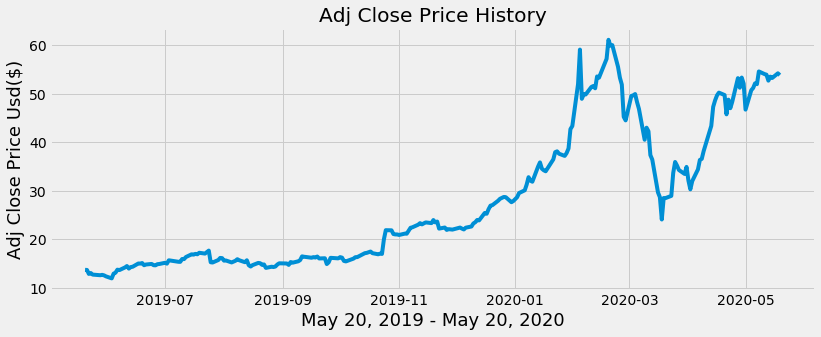

In [18]:
#Visually Show the price
plt.figure(figsize=(12.2,4.5))
plt.plot(df['Close'],label='Close')
plt.title('Adj Close Price History')
plt.xlabel('May 20, 2019 - May 20, 2020',fontsize=18)
plt.ylabel('Adj Close Price Usd($)',fontsize=18)
plt.show()

In [19]:
#Prepare the data to calculate The RSI
#get the difference in price from the previous day
delta=df['Close'].diff(1)
delta

Date
2019-05-20         NaN
2019-05-21   -0.018667
2019-05-22   -0.823333
2019-05-23    0.184000
2019-05-24   -0.324000
                ...   
2020-05-13   -1.230000
2020-05-14    0.824665
2020-05-15   -0.277332
2020-05-18    0.964001
2020-05-19   -0.374668
Name: Close, Length: 253, dtype: float64

In [20]:
#get rid of NaN
delta=delta.dropna()
delta

Date
2019-05-21   -0.018667
2019-05-22   -0.823333
2019-05-23    0.184000
2019-05-24   -0.324000
2019-05-28   -0.128667
                ...   
2020-05-13   -1.230000
2020-05-14    0.824665
2020-05-15   -0.277332
2020-05-18    0.964001
2020-05-19   -0.374668
Name: Close, Length: 252, dtype: float64

In [21]:
#Get the Possitive gains(up) and negative gain
up=delta.copy()
down=delta.copy()

In [22]:
up[up<0]=0
down[down>0]=0

In [23]:
#Get the time period
period=20
#Calculate the average gain and the average loss
AVG_gain=up.rolling(window=period).mean()
Avg_Loss=abs(down.rolling(window=period).mean())

In [24]:
#calculate the RSI
#Calculate the Relative Strength(RS)
RS=AVG_gain/Avg_Loss
#Calculate the relative Strength Index(RSI)
RSI=100.0-(100.0/(1.0+RS))

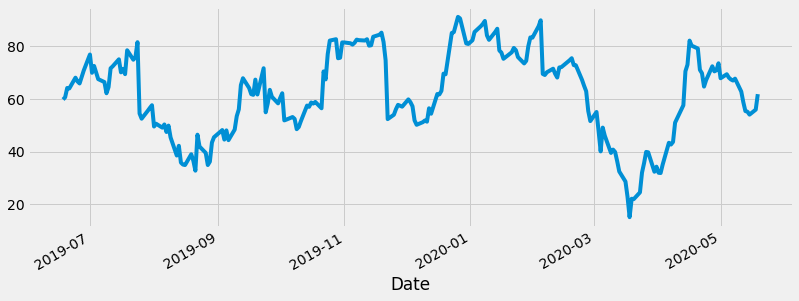

In [25]:
#show the RSI Visually
plt.figure(figsize=(12.2,4.5))
RSI.plot()
plt.show()

In [26]:
#put it all togather
#create a new data frame
new_df=pd.DataFrame()
new_df['Close']=df['Close']
new_df['RSI']=RSI
new_df

,Close,RSI
Date,,
2019-05-20,13.690667,NaN
2019-05-21,13.672000,NaN
2019-05-22,12.848667,NaN
2019-05-23,13.032667,NaN
2019-05-24,12.708667,NaN
...,...,...
2020-05-13,52.730667,55.380497
2020-05-14,53.555332,55.142813
2020-05-15,53.278000,54.038960


In [29]:
sell=new_df[new_df['RSI']>60]
buy=new_df[new_df['RSI']<40]

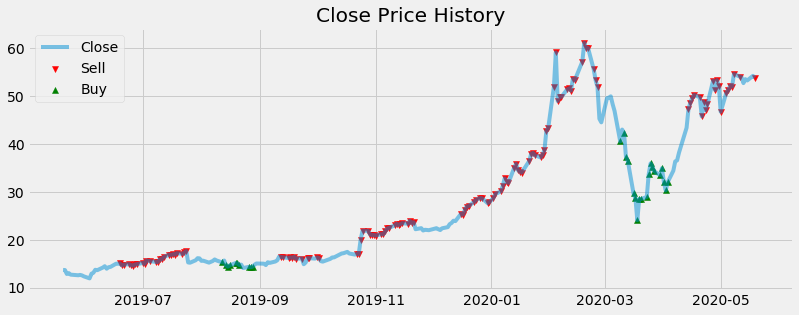

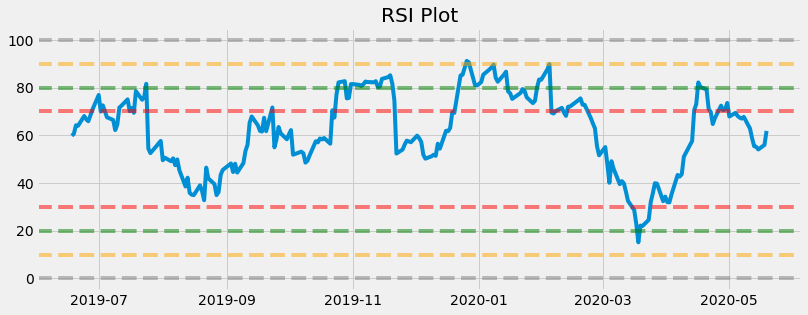

In [33]:
#Visually Show The Adjusted Close Price RSI
#Plot the adjusted Close price
plt.figure(figsize=(12.2,4.5))
plt.plot(new_df['Close'],alpha=0.5)
plt.scatter(sell.index,sell['Close'],alpha=1,marker='v',color='red',label='Sell')
plt.scatter(buy.index,buy['Close'],alpha=1,marker='^',color='green',label="Buy")
plt.title('Close Price History')
plt.legend(loc='upper left')
plt.show()
#Plot the corresponding RSI Values and the significant level
plt.figure(figsize=(12.2,4.5))
plt.title('RSI Plot')
plt.plot(new_df['RSI'])
plt.axhline(0,linestyle='--',alpha=0.5,color='gray')
plt.axhline(10,linestyle='--',alpha=0.5,color='Orange')
plt.axhline(20,linestyle='--',alpha=0.5,color='green')
plt.axhline(30,linestyle='--',alpha=0.5,color='red')
plt.axhline(70,linestyle='--',alpha=0.5,color='red')
plt.axhline(80,linestyle='--',alpha=0.5,color='green')
plt.axhline(90,linestyle='--',alpha=0.5,color='Orange')
plt.axhline(100,linestyle='--',alpha=0.5,color='gray')